## LDA and NMF exploration 

### Given the bag of words matrix (A), we want to evaluate probabilitiy distributions of topics per document and of words per topic. These probabilities are represented by matrices $\Theta$ and $\Phi$, respectively.

In [1]:
from sklearn.datasets import fetch_20newsgroups
ds = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers','footers','quotes'))
documents=ds.data

### If you wanna learn more about the topics, I'll include the links i've used to learn. Please use it


1. LDA - https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2

2. CountVectorizer - https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

3. implementation of LDA : https://towardsdatascience.com/latent-dirichlet-allocation-for-topic-modelling-explained-algorithm-and-python-scikit-learn-c65a82e7304d



In [2]:
#documents

### Since LDA is based on Bag of words, we are using Countvectorizer for building BOG

In [3]:


import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
no_features=1000
# perform document vectorization
lda_vectorizer=CountVectorizer(max_df=0.90, min_df=2, max_features=no_features, stop_words='english')

lda=lda_vectorizer.fit_transform(documents)
lda_feature_names=lda_vectorizer.get_feature_names()
# extract matrix A of word counts
A=lda.toarray()
print(np.shape(lda.toarray()))

# we have 11314 rows and 1000 columns

#a.head

(11314, 1000)


/Users/hwan/opt/anaconda3/envs/machine_learning_v2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [4]:
#If you wanna look at unique feature names, uncomment this one

#b=lda_feature_names
#b

The given word co-occurrence matrix is a sparse matrix of size 1134x1000.

In [5]:
### Normalize rows of the matrix A to sum to 1 ----> turning them into a sum of probaility?
A=A[~np.all(A==0, axis=1)] # remove rows with zeros
#print(A.shape) ---> this line will hive you the shape of array after removing zeros.(10907,1000)
s=A.sum(axis=1) # sums of row elements-->So that we can use it to divide to get probabilty.
#print(s[0])
s=s[:,np.newaxis]
A_norm=A/s
#print(A_norm[0]) now we have the probailities
res=A_norm[~np.all(A_norm==0, axis=1)] # remove rows containing only zeros ----> if a row contains only zeros, that means, it doesn't have any texts

### LDA modeling with the number of topics = 20

In [6]:
from sklearn.decomposition import LatentDirichletAllocation
topic_n=20
# both batch and online modes are related to the execution of the Expectation-Minimization algorithm
lda_model=LatentDirichletAllocation(n_components=topic_n, max_iter=10,learning_method='online',
          doc_topic_prior=2, learning_offset=50, random_state=0).fit(res)

In [7]:
a = lda_model.components_
#a[1]

components_ : Variational parameters for topic word distribution. Since the complete conditional for topic word distribution is a Dirichlet, components_[i, j] can be viewed as pseudocount that represents the number of times word j was assigned to topic i. It can also be viewed as distribution over the words for each topic after normalization: model.components_ / model.components_.sum(axis=1)[:, np.newaxis].

## Θ - Probabilty between topics and documents

## Φ - Probabilty between words and topics

### Questions: What matrix does the above array represent? $\Theta$ or $\Phi$? What is the constraint rule that it has to satisfy? What operation would you perform on the above array in order to satisfy this constraint?

### Answer

**What matrix does the above array represent?  Θ  or  Φ ?**


The matrix represents Φ. The constraint is the number of times a particular word is assigned to a topic.

**What is the constraint rule that it has to satisfy? What operation would you perform on the above array in order to satisfy this constraint?**



we can divide the matrix by the sum of their corresponding rows in order to satisfy the above constraint.

In [12]:
# leave your answer here
#What matrix does the above array represent?  Θ  or  Φ ?
#The matrix represents Φ. This contains the pseudocount of number of times a particular word is assigned to a topic.

# What is the constraint rule that it has to satisfy? What operation would you perform on the above array in order to satisfy this constraint?
# we can divide the matrix by the sum of their corresponding rows in order to satisfy this constraint.

print("The answer is above the cell.")


The answer is above the cell.


Let's find the remaining matrix. How can we interpret its rows?   

In [9]:
fitted_d = lda_model.transform(res)
fitted_d

array([[0.0490991 , 0.05069662, 0.04899343, ..., 0.04945965, 0.04983452,
        0.05043733],
       [0.04919852, 0.05019689, 0.0494494 , ..., 0.05039332, 0.0498913 ,
        0.05081882],
       [0.04923379, 0.04914402, 0.04910757, ..., 0.04946726, 0.05261263,
        0.05001354],
       ...,
       [0.0498158 , 0.04938867, 0.04931482, ..., 0.04889487, 0.04917106,
        0.0505202 ],
       [0.04986369, 0.04946514, 0.04997802, ..., 0.05045374, 0.04937628,
        0.04955566],
       [0.05023174, 0.04958213, 0.05048218, ..., 0.04962112, 0.05050255,
        0.05001966]])

In [10]:
# display top ten words per topic
def display_topics(model, feature_names, top_words):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx+1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-top_words-1:-1]]))
top_words=10
display_topics(lda_model, lda_feature_names, top_words)

Topic 1:
think data problems area law good simple write sounds black
Topic 2:
far run second just hear read price probably fast like
Topic 3:
fact right line need change order use left yes given
Topic 4:
pretty know key bike state book having maybe issue reading
Topic 5:
doesn actually david probably information use large little video simply
Topic 6:
wrong tell did word drivers interested hi test type win
Topic 7:
got game card dos chip answer anybody 20 wanted won
Topic 8:
make true sure times subject wouldn look way say like
Topic 9:
didn way games does money don people john just thing
Topic 10:
edu car course set based right better info especially man
Topic 11:
trying place address send home just available ve ca year
Topic 12:
long new evidence buy just couple looks apple gun said
Topic 13:
point local hope source advance god better note general exactly
Topic 14:
ask following isn number power free appreciate programs original ibm
Topic 15:
bit says email ll 50 version claim oh gove

Most of these topics do not seem to make sense. Can we fine-tune the model to get better results?

### In the code below, we study the effect of Dirichlet parameter choice $\alpha$ on the distribution of topics 1 and 10 and the clarity of their word representations.    

In [ ]:
#

### Here, in the for loop, they are using 'i' on the doc_topic_prior parameter

Fitting LDA models with data topic prior, alpha=0.500000, n_topics=20 
done in 4.330s.
Fitting LDA models with data topic prior, alpha=1.500000, n_topics=20 
done in 4.062s.
Fitting LDA models with data topic prior, alpha=2.500000, n_topics=20 
done in 4.026s.
Fitting LDA models with data topic prior, alpha=3.500000, n_topics=20 
done in 4.036s.
Fitting LDA models with data topic prior, alpha=4.500000, n_topics=20 
done in 4.005s.


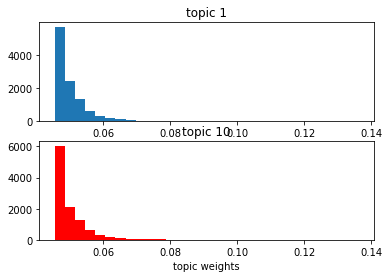

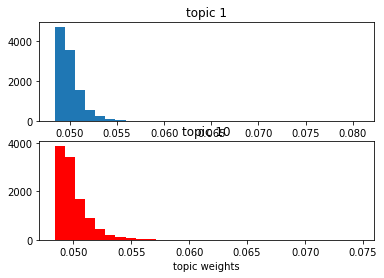

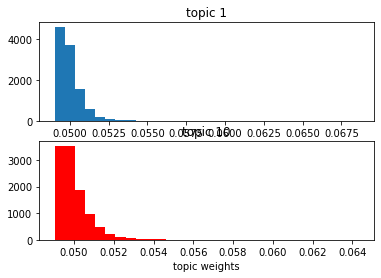

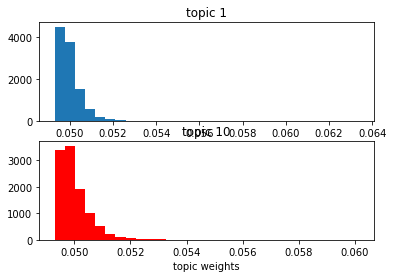

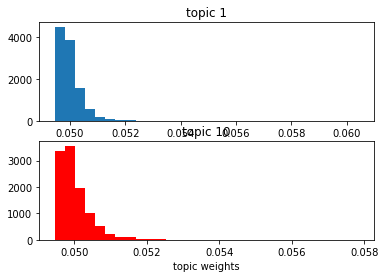

In [11]:
from matplotlib import pyplot as plt
import time
from time import time
figs={}
axs={}
k=0
for i in np.arange(0.5,5,1):
    n_topics = 20
    print("Fitting LDA models with data topic prior, "
          "alpha=%2f, n_topics=%d "
          % (i, n_topics))

    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                    doc_topic_prior=i,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)
    t0 = time()
    lda_model.fit(res)

    fitted_d = lda_model.transform(res)
     
    figs[i]=plt.figure()
    axs[k]=figs[i].add_subplot(211)
    axs[k].hist(fitted_d[:,1], bins=30)
    axs[k].set_title('topic '+str(1))
    axs[k].set_xlabel('topic weights') 

    axs[k+1]=figs[i].add_subplot(212)
    axs[k+1].hist(fitted_d[:,10], bins=30, color='r')
    axs[k+1].set_title('topic '+str(10))
    axs[k+1].set_xlabel('topic weights') 
    k=k+1
    print("done in %0.3fs." % (time() - t0))

Do you observe a smoothing effect of the increasing $\alpha$-parameter?

### Topics described by top ten words inferred from the probabilistic model trained with $\alpha$ =0.5 

### adjustijng the value for the doc_topic_prior parameter

What is doc_dopic_prior?

Prior of topic word distribution beta.

In [13]:
lda_model=LatentDirichletAllocation(n_components=20, max_iter=5,learning_method='online',
          doc_topic_prior=0.5, learning_offset=50, random_state=0).fit(res)
display_topics(lda_model, lda_feature_names, top_words)

Topic 1:
problems think data 00 law 15 area add simple write
Topic 2:
far second stuff price just deleted hear run read unless
Topic 3:
right fact yes need line heard left use change remember
Topic 4:
know pretty having key book bike state ago maybe issue
Topic 5:
doesn actually looking probably video david use information little large
Topic 6:
windows hi tell wrong did word win test mean interested
Topic 7:
got game card anybody dos 20 chip posting answer different
Topic 8:
make sure true look year say times subject wouldn days
Topic 9:
didn games way agree seen thing play driver don does
Topic 10:
car edu info better set course monitor man high thanks
Topic 11:
address send trying place article window available phone home copy
Topic 12:
long evidence net new just apple example said gun looks
Topic 13:
point god hope local advance source note exactly means general
Topic 14:
number following isn ask free original power programs kind really
Topic 15:
bit says ll email version doing oh m

### Topics described by top ten words inferred from the probabilistic model trained with $\alpha$ =5.0 

In [14]:
lda_model=LatentDirichletAllocation(n_components=20, max_iter=5,learning_method='online',
          doc_topic_prior=5, learning_offset=50, random_state=0).fit(res)
display_topics(lda_model, lda_feature_names, top_words)

Topic 1:
think data write area knows sounds good problems level black
Topic 2:
far second just american like fast run plus folks price
Topic 3:
fact line include use right need left change order yes
Topic 4:
pretty know bike having key issue reading ago book state
Topic 5:
doesn david large actually simply information use little probably person
Topic 6:
word wrong drivers tell like did cause win ones good
Topic 7:
got chip card game answer dos 20 recently wanted anybody
Topic 8:
true subject wouldn make times like image say way certainly
Topic 9:
don does didn just money like way mouse people value
Topic 10:
set edu man just course monitor interesting single info especially
Topic 11:
trying place home address just send national clinton ca available
Topic 12:
looks evidence just started new long lost buy know asking
Topic 13:
hope source guy local point note israeli general drives exactly
Topic 14:
ask following isn appreciate number past programs free ago does
Topic 15:
bit says email 

### Question: Examine the histogram distribution of topic 1 across all documents for varying values of $\alpha$. Does it change? Compare word descriptions of topic 1 inferred by LDA model with $\alpha$=0.5 and $\alpha$=5.0. Do you find one of them making more sense than another? How are your findings consistent with the behaviour of the corresponding histogram distribution as $\alpha$ increases?

### Answer:
 **Examine the histogram distribution of topic 1 across all documents for varying values of  𝛼 .Does it change?**
 
 Yes. The Histogram is getting smoother, when the value of 𝛼 increaces. As the value increces, the histogram distribution becomes more and more uniform.



** Compare word descriptions of topic 1 inferred by LDA model with  𝛼 =0.5 and  𝛼 =5.0. Do you find one of them making more sense than another?**

The model with 𝛼=5 is less ambiguous than the model with 𝛼 =0.5. the topics are uniformly spread over the given domain so that the topics
 are less ambiguous than the latter one



 **How are your findings consistent with the behaviour of the corresponding histogram distribution as  𝛼  increases? **

 Distribution of the histogram becomes more uniform when the value of alpha increaces.

In [15]:
# type your answer here
 #Question:
 #Examine the histogram distribution of topic 1 across all documents for varying values of  𝛼 .Does it change?
 #Yes. The Histogram is getting smoother, when the value of 𝛼 increaces. As the value increces, the histogram distribution becomes more and more uniform.

 #Compare word descriptions of topic 1 inferred by LDA model with  𝛼 =0.5 and  𝛼 =5.0. Do you find one of them making more sense than another?

 #The model with 𝛼=5 is less ambiguous than the model with 𝛼 =0.5. the topics are uniformly spread over the given domain so that the topics
 # are less ambiguous than the latter one

 #How are your findings consistent with the behaviour of the corresponding histogram distribution as  𝛼  increases?
 #Distribution of the histogram becomes more uniform when the value of alpha increaces.

## Non-negative Matrix Factorization

In [16]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# We need to use tf-idf for the sake of feature name generation. NMF, unlike LDA class, has no feature_name attribute.
vect = TfidfVectorizer(max_df=0.95, min_df=2, max_features =no_features, stop_words='english')
tf=vect.fit_transform(documents)
# Here, Frobenius norm has been implemented as the objective function
nmf_model=NMF(n_components=topic_n, random_state=1, alpha=0.1, l1_ratio=0.5, init='nndsvd').fit(tf)

/Users/hwan/opt/anaconda3/envs/machine_learning_v2/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


In [18]:
# word-topic matrix 
nmf_model.components_

array([[0.        , 0.13707169, 0.        , ..., 0.32544677, 0.03153268,
        0.12358671],
       [0.        , 0.        , 0.        , ..., 0.03020766, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02249712, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.04532894, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02263642, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0368384 , 0.        ,
        0.        ]])

In [19]:
# topic-document matrix
fitted_d = nmf_model.transform(res)
fitted_d

/Users/hwan/opt/anaconda3/envs/machine_learning_v2/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


array([[0.00556792, 0.        , 0.        , ..., 0.        , 0.00481974,
        0.        ],
       [0.00449807, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392158, 0.        , 0.        , ..., 0.        , 0.00470433,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04836511, 0.        ,
        0.        ],
       [0.00421203, 0.        , 0.        , ..., 0.00178358, 0.        ,
        0.        ]])

In [20]:
nmf_feat=vect.get_feature_names()

/Users/hwan/opt/anaconda3/envs/machine_learning_v2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### The objective function for NMF can be defined either as an $L^2$ or Frobenius norm ($\sum_{i,j} A_{ij}^2$) with regularization terms added or as a Kullback-Leibler divergence distance defined by the parameter "beta_loss".  Below we will compare the clarity of topics discovered using these 2 metrics.

In [21]:
# Display topics estimated using Frobenius norm
display_topics(nmf_model, nmf_feat, top_words)

Topic 1:
people time right did good said say make way government
Topic 2:
window problem using server application screen display motif manager running
Topic 3:
god jesus bible christ faith believe christian christians sin church
Topic 4:
game team year games season players play hockey win league
Topic 5:
new 00 sale 10 price offer shipping condition 20 15
Topic 6:
thanks mail advance hi looking info help information address appreciated
Topic 7:
windows file files dos program version ftp ms directory running
Topic 8:
edu soon cs university ftp internet article email pub david
Topic 9:
key chip clipper encryption keys escrow government public algorithm nsa
Topic 10:
drive scsi drives hard disk ide floppy controller cd mac
Topic 11:
just ll thought tell oh little fine work wanted mean
Topic 12:
does know anybody mean work say doesn help exist program
Topic 13:
card video monitor cards drivers bus vga driver color memory
Topic 14:
like sounds looks look bike sound lot things really thing
T

In [22]:
# Display topics estimated using Kullback-Leibler norm.
nmf_model2=NMF(n_components=topic_n, random_state=1, max_iter=400, alpha=0.1, l1_ratio=0.5, solver='mu', beta_loss='kullback-leibler',init='random').fit(tf)

/Users/hwan/opt/anaconda3/envs/machine_learning_v2/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


In [23]:
display_topics(nmf_model2, nmf_feat, top_words)

Topic 1:
edu information soon university based general thank states internet effect
Topic 2:
read article book evidence subject came david interesting known science
Topic 3:
year com game team games play win best players season
Topic 4:
just problem doesn don like try work maybe little doing
Topic 5:
oh world image live american ca clinton faq gas allow
Topic 6:
key power line chip encryption clipper single keys ground technology
Topic 7:
thanks windows does card know mail hi help anybody advance
Topic 8:
people heard law wrong gun sort likely government rights certainly
Topic 9:
buy true israel hand jews children looks war company state
Topic 10:
drive file files memory disk scsi hard apple machine copy
Topic 11:
good car old bike high like nice end small low
Topic 12:
people believe said away sound went hit body radio major
Topic 13:
god people jesus life ask believe christian bible church religion
Topic 14:
use using program available window set running sun version screen
Topic 15:


### Topic 12 on religion has all relevant words and doe not have an ambiguouse meaning. and Topic 7 is definitely about the gun law! Both norms seem to do an equally good job in topic discovery. 


### Question: Which method was able to find more meaningful topics? How are NMF and LDA approaches conceptually different? 

### Answer :

Unlike LDA, NMF approach is free of a priori constraints placed on word and topic distributions.
The LDA is a generative model.
Each document is viewed as a mix of multiple distinct topics. An advantage of 
the LDA technique is that one does not have to know in advance what the topics will look like.

 Non-negative Matrix Factorization is a Linear-algebraic model, that factors high-dimensional vectors into a low-dimensionality representation.
Similar to Principal component analysis (PCA), NMF takes advantage of the fact that the vectors are non-negative.


Using NMF we could find more meaningful topics


In [24]:
#Leave your answer here
print("The answer is above the cell")

The answer is above the cell


In [25]:
#Which method was able to find more meaningful topics?
#Definetly NMF. If you Observe topic 16, it arranged all the numbers under one topic and almost all topics categorized by nmf sounds less ambiguous than 
#LDA.

###Question 1
#How are NMF and LDA approaches conceptually different?
#Unlike LDA, NMF approach is free of a priori constraints placed on word and topic distributions.
#The LDA is a generative model.
#Each document is viewed as a mix of multiple distinct topics. An advantage of 
#the LDA technique is that one does not have to know in advance what the topics will look like.

# Non-negative Matrix Factorization is a Linear-algebraic model, that factors high-dimensional vectors into a low-dimensionality representation.
# Similar to Principal component analysis (PCA), NMF takes advantage of the fact that the vectors are non-negative.

